# Support Vector Machine

Sheny Lin・4/3/2023

### This assignment is to apply support vector machine to the BMD dataset and compare its accuracy to logistic regression, K-Nearest Neighbors (KNN), and random forest.

# Write-up

## Support Vector Machine - Radial Basis Function (RBF) Kernel

The classification accuracy of the SVM using the RBF kernel is 0.95. Out of all the patients, 9 were misclassified as false negatives and 0 as false positives.

### Comparison to Logistic Regression

The classification accuracy of logistic regression was 0.84, which was inferior to the SVM's accuracy of 0.95.

### Comparison to K-Nearest Neighbors (KNN)

The classification accuracy of KNN was 0.79, which was inferior to the SVM's accuracy of 0.95.

### Comparison to Random Forest

When n_estimators=5, random forest achieved a classification accuracy of 0.97, which was the highest among the four analyzing algorithms and outperformed SVM (0.95).

### Comparison to Decision Tree

When max_depth=5, the decision tree achieved a classification accuracy of 0.93, which was lower but similar to the SVM's accuracy of 0.95.

In [1]:
#import libraries
import pandas as pd
import numpy as np #for data manipulation
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #for splitting the data into train and test samples
from sklearn.metrics import classification_report #for model evaluation metrics
from sklearn.svm import SVC #for Support Vector Classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
#load dataset
BMD = pd.read_csv('https://raw.githubusercontent.com/shenylin/Data-Science/main/BMD%20-%201.csv')
print(BMD)

        id    age  weight_kg  height_cm   bmd  fracture
0      469  57.05       64.0      155.5  0.88       0.0
1     8724  75.74       78.0      162.0  0.79       0.0
2     6736  70.78       73.0      170.5  0.91       0.0
3    24180  78.25       60.0      148.0  0.71       0.0
4    17072  54.19       55.0      161.0  0.79       0.0
..     ...    ...        ...        ...   ...       ...
164  21892  77.98       74.0      164.0  0.79       1.0
165  24140  50.29       59.0      161.0  0.80       1.0
166   6969  46.36       67.0      169.0  0.80       1.0
167   5505  54.79       70.0      166.0  0.81       1.0
168     71  69.99       68.5      165.0  0.87       1.0

[169 rows x 6 columns]


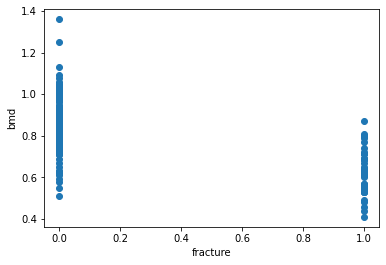

In [3]:
#Scatter Plot
plt.scatter(BMD['fracture'], BMD['bmd'])
plt.xlabel('fracture')
plt.ylabel('bmd')
plt.show()

In [4]:
#Normalize X
min_max_scaler = MinMaxScaler()
BMD[['bmd', 'age']] = min_max_scaler.fit_transform(BMD[['bmd', 'age']])
print(BMD)

        id       age  weight_kg  height_cm       bmd  fracture
0      469  0.401209       64.0      155.5  0.494737       0.0
1     8724  0.754250       78.0      162.0  0.400000       0.0
2     6736  0.660559       73.0      170.5  0.526316       0.0
3    24180  0.801662       60.0      148.0  0.315789       0.0
4    17072  0.347185       55.0      161.0  0.400000       0.0
..     ...       ...        ...        ...       ...       ...
164  21892  0.796562       74.0      164.0  0.400000       1.0
165  24140  0.273517       59.0      161.0  0.410526       1.0
166   6969  0.199282       67.0      169.0  0.410526       1.0
167   5505  0.358519       70.0      166.0  0.421053       1.0
168     71  0.645637       68.5      165.0  0.484211       1.0

[169 rows x 6 columns]


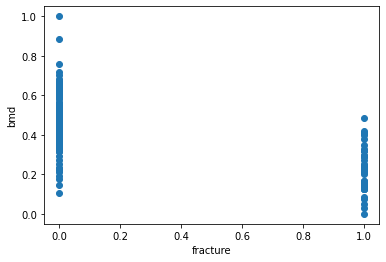

In [5]:
#Scatter Plot Normalized X
plt.scatter(BMD['fracture'], BMD['bmd'])
plt.xlabel('fracture')
plt.ylabel('bmd')
plt.show()

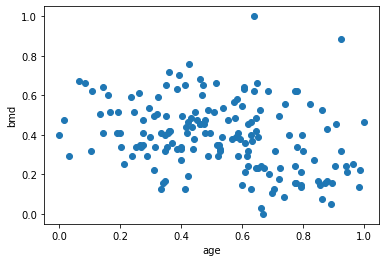

In [6]:
#Scatter Plot
plt.scatter(BMD['age'], BMD['bmd'])
plt.xlabel('age')
plt.ylabel('bmd')
plt.show()

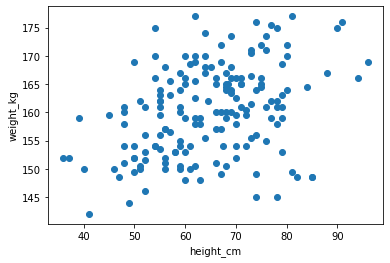

In [7]:
#Scatter Plot
plt.scatter(BMD['weight_kg'], BMD['height_cm'])
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.show()

In [8]:
BMD

,id,age,weight_kg,height_cm,bmd,fracture
0,469,0.401209,64.0,155.5,0.494737,0.0
1,8724,0.754250,78.0,162.0,0.400000,0.0
2,6736,0.660559,73.0,170.5,0.526316,0.0
3,24180,0.801662,60.0,148.0,0.315789,0.0
4,17072,0.347185,55.0,161.0,0.400000,0.0
...,...,...,...,...,...,...
164,21892,0.796562,74.0,164.0,0.400000,1.0
165,24140,0.273517,59.0,161.0,0.410526,1.0
166,6969,0.199282,67.0,169.0,0.410526,1.0
167,5505,0.358519,70.0,166.0,0.421053,1.0


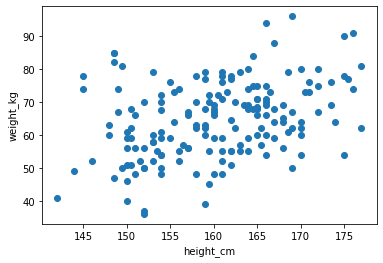

In [9]:
#Normalize X
#min_max_scaler = MinMaxScaler()
#[['age', 'weight_kg', 'height_cm']] = min_max_scaler.fit_transform(BMD[['age', 'weight_kg', 'height_cm']])

#Scatter Plot X
plt.scatter(BMD['height_cm'], BMD['weight_kg'])
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.show()

In [10]:
#Set Features and Target Variable
X = BMD[['age', 'weight_kg', 'height_cm', 'bmd']]
Y = BMD['fracture']

## Radial Basis Function (RBF) kernel

Accuracy:  0.9467455621301775


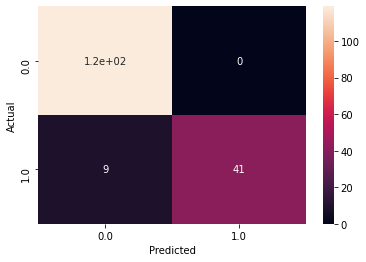

In [11]:
#Non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', gamma =0.7, C=1.0)
nonlinear_clf.fit(X,Y)
Y_pred=nonlinear_clf.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'],
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

## Decision Tree


Accuracy:  0.893491124260355


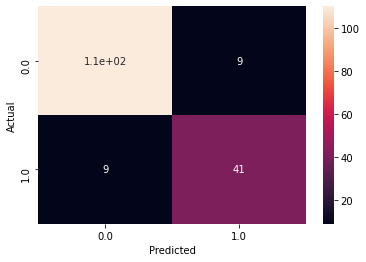

In [12]:
#Create classifier - DecisionTree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

Accuracy:  0.9289940828402367


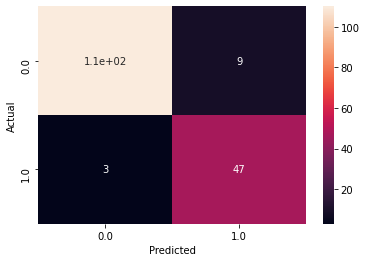

In [13]:
#Create classifier - DecisionTree
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

Accuracy:  0.9763313609467456


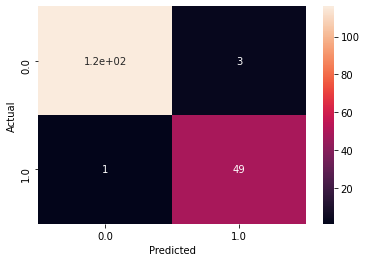

In [14]:
#Create classifier - DecisionTree
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

          age  weight_kg  height_cm       bmd
0    0.401209       64.0      155.5  0.494737
1    0.754250       78.0      162.0  0.400000
2    0.660559       73.0      170.5  0.526316
3    0.801662       60.0      148.0  0.315789
4    0.347185       55.0      161.0  0.400000
..        ...        ...        ...       ...
164  0.796562       74.0      164.0  0.400000
165  0.273517       59.0      161.0  0.410526
166  0.199282       67.0      169.0  0.410526
167  0.358519       70.0      166.0  0.421053
168  0.645637       68.5      165.0  0.484211

[169 rows x 4 columns]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

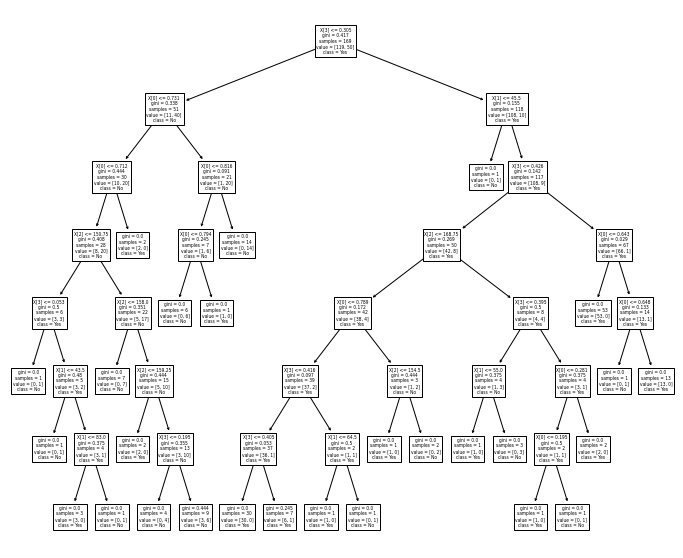

In [15]:
print (X)
print (Y_pred)

prediction = clf.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)

importances = list(clf.feature_importances_)
#Print out the feature and importances 
print (importances)

print(classification_report(Y, Y_pred))

fig = plt.figure(figsize=(12, 10))
tree.plot_tree(clf.fit(X,Y), class_names=['Yes', 'No'])
plt.show()

## Random Forest

Accuracy:  0.9408284023668639


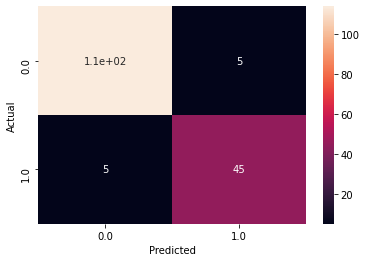

In [16]:
#Create classifier - RandomForest
clf = RandomForestClassifier(n_estimators=3)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

Accuracy:  0.9704142011834319


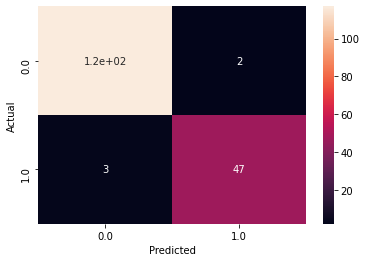

In [17]:
#Create classifier - RandomForest
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

Accuracy:  0.9644970414201184


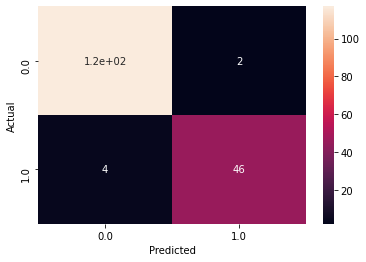

In [18]:
#Create classifier - RandomForest
clf = RandomForestClassifier(n_estimators=7)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

In [19]:
print (X)
print (Y_pred)

prediction = clf.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)

importances = list(clf.feature_importances_)
#Print out the feature and importances 
print (importances)

print(classification_report(Y, Y_pred))

fig = plt.figure(figsize=(12, 10))
#tree.plot_tree(clf.fit(X,Y), class_names=['Yes', 'No'])
plt.show()

          age  weight_kg  height_cm       bmd
0    0.401209       64.0      155.5  0.494737
1    0.754250       78.0      162.0  0.400000
2    0.660559       73.0      170.5  0.526316
3    0.801662       60.0      148.0  0.315789
4    0.347185       55.0      161.0  0.400000
..        ...        ...        ...       ...
164  0.796562       74.0      164.0  0.400000
165  0.273517       59.0      161.0  0.410526
166  0.199282       67.0      169.0  0.410526
167  0.358519       70.0      166.0  0.421053
168  0.645637       68.5      165.0  0.484211

[169 rows x 4 columns]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

<Figure size 864x720 with 0 Axes>

## KNN
### Determine the optimal K - square root of N (method #1)

Accuracy:  0.757396449704142


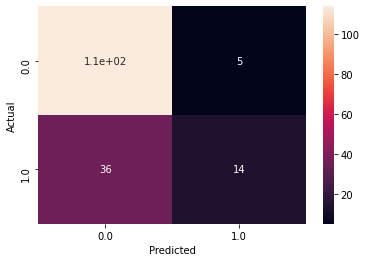

          age  weight_kg  height_cm       bmd
0    0.401209       64.0      155.5  0.494737
1    0.754250       78.0      162.0  0.400000
2    0.660559       73.0      170.5  0.526316
3    0.801662       60.0      148.0  0.315789
4    0.347185       55.0      161.0  0.400000
..        ...        ...        ...       ...
164  0.796562       74.0      164.0  0.400000
165  0.273517       59.0      161.0  0.410526
166  0.199282       67.0      169.0  0.410526
167  0.358519       70.0      166.0  0.421053
168  0.645637       68.5      165.0  0.484211

[169 rows x 4 columns]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0

In [20]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

Accuracy:  0.7514792899408284


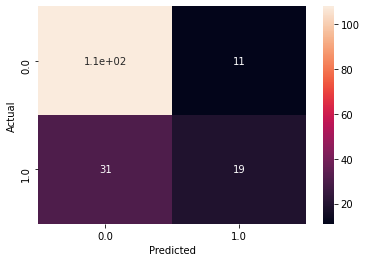

          age  weight_kg  height_cm       bmd
0    0.401209       64.0      155.5  0.494737
1    0.754250       78.0      162.0  0.400000
2    0.660559       73.0      170.5  0.526316
3    0.801662       60.0      148.0  0.315789
4    0.347185       55.0      161.0  0.400000
..        ...        ...        ...       ...
164  0.796562       74.0      164.0  0.400000
165  0.273517       59.0      161.0  0.410526
166  0.199282       67.0      169.0  0.410526
167  0.358519       70.0      166.0  0.421053
168  0.645637       68.5      165.0  0.484211

[169 rows x 4 columns]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0

In [21]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

Accuracy:  0.7455621301775148


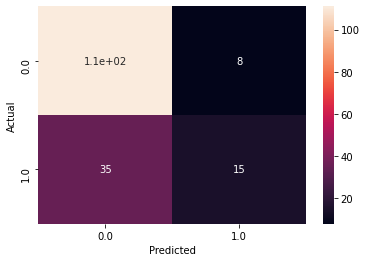

          age  weight_kg  height_cm       bmd
0    0.401209       64.0      155.5  0.494737
1    0.754250       78.0      162.0  0.400000
2    0.660559       73.0      170.5  0.526316
3    0.801662       60.0      148.0  0.315789
4    0.347185       55.0      161.0  0.400000
..        ...        ...        ...       ...
164  0.796562       74.0      164.0  0.400000
165  0.273517       59.0      161.0  0.410526
166  0.199282       67.0      169.0  0.410526
167  0.358519       70.0      166.0  0.421053
168  0.645637       68.5      165.0  0.484211

[169 rows x 4 columns]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0

In [22]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

### Determine the optimal K - Calculate and plot error rate versus K values (method #2)

In [23]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

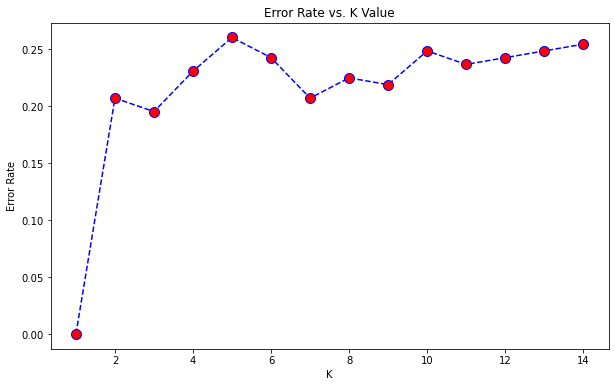

In [24]:
#Determine classifier error rate
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, Y)
    #Y_pred=knn.predict(X)
    pred_i = knn.predict(X)
    error_rate.append(np.mean(pred_i != Y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Accuracy:  0.7928994082840237


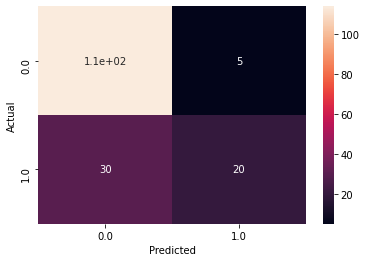

          age  weight_kg  height_cm       bmd
0    0.401209       64.0      155.5  0.494737
1    0.754250       78.0      162.0  0.400000
2    0.660559       73.0      170.5  0.526316
3    0.801662       60.0      148.0  0.315789
4    0.347185       55.0      161.0  0.400000
..        ...        ...        ...       ...
164  0.796562       74.0      164.0  0.400000
165  0.273517       59.0      161.0  0.410526
166  0.199282       67.0      169.0  0.410526
167  0.358519       70.0      166.0  0.421053
168  0.645637       68.5      165.0  0.484211

[169 rows x 4 columns]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0

In [25]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

## Logistic Regression

In [26]:
#import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#LogisticRegression_CrossValidation
from sklearn.model_selection import cross_val_score

#LogisticRegressionDS_TrainTest
from sklearn.model_selection import train_test_split

In [27]:
#load dataset
BMD = pd.read_csv('https://raw.githubusercontent.com/shenylin/Data-Science/main/BMD%20-%201.csv')
print(BMD)

        id    age  weight_kg  height_cm   bmd  fracture
0      469  57.05       64.0      155.5  0.88       0.0
1     8724  75.74       78.0      162.0  0.79       0.0
2     6736  70.78       73.0      170.5  0.91       0.0
3    24180  78.25       60.0      148.0  0.71       0.0
4    17072  54.19       55.0      161.0  0.79       0.0
..     ...    ...        ...        ...   ...       ...
164  21892  77.98       74.0      164.0  0.79       1.0
165  24140  50.29       59.0      161.0  0.80       1.0
166   6969  46.36       67.0      169.0  0.80       1.0
167   5505  54.79       70.0      166.0  0.81       1.0
168     71  69.99       68.5      165.0  0.87       1.0

[169 rows x 6 columns]


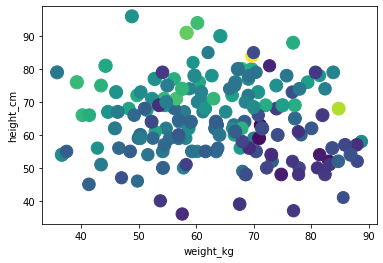

In [28]:
#Scatter Plot
plt.scatter(BMD['age'], BMD['weight_kg'], BMD['height_cm'], BMD['bmd'])
plt.xlabel('weight_kg')
plt.ylabel('height_cm')
plt.show()

In [29]:
#Set Features and Target Variable
X = BMD[['age', 'weight_kg', 'height_cm', 'bmd']]
Y = BMD['fracture']

In [30]:
#Create classifier
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear') #L1: Lasso Regression

In [31]:
logistic_regression= LogisticRegression(penalty='l2', solver='liblinear') #L2: Ridge Regression

[-0.24065668] [[ 0.04675251 -0.06114481  0.01590842 -3.1252597 ]]
Accuracy:  0.8284023668639053


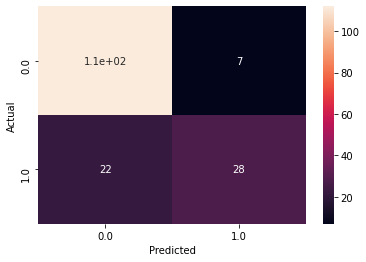

In [32]:
logistic_regression.fit(X,Y)
Y_pred=logistic_regression.predict(X)

print(logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

In [33]:
#print (X)
print (Y_pred)

print(classification_report(Y, Y_pred))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       119
         1.0       0.80      0.56      0.66        50

    accuracy                           0.83       169
   macro avg       0.82      0.75      0.77       169
weighted avg       0.83      0.83      0.82       169



Cross-Validation Accuracy [0.94117647 0.85294118 0.91176471 0.79411765 0.63636364]
Coefficients [-0.24065668] [[ 0.04675251 -0.06114481  0.01590842 -3.1252597 ]]
Accuracy:  0.8284023668639053


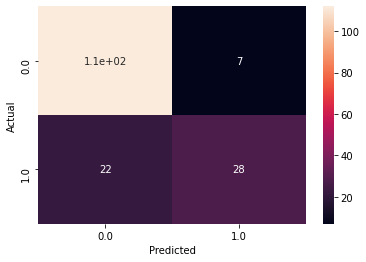

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       119
         1.0       0.80      0.56      0.66        50

    accuracy                           0.83       169
   macro avg       0.82      0.75      0.77       169
weighted avg       0.83      0.83      0.82       169



In [34]:
#results = cross_val_score(logistic_regression, X, Y, cv=kfold)
results = cross_val_score(logistic_regression, X, Y, cv=5)
print('Cross-Validation Accuracy', results)

print('Coefficients', logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print(classification_report(Y, Y_pred))

Coefficients [0.] [[ 0.03592508 -0.02866671  0.03351517 -9.0382984 ]]
Accuracy:  0.8431372549019608


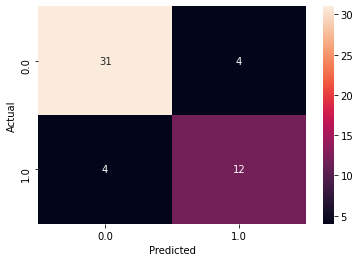

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        35
         1.0       0.75      0.75      0.75        16

    accuracy                           0.84        51
   macro avg       0.82      0.82      0.82        51
weighted avg       0.84      0.84      0.84        51



In [35]:
#Split Features and Target Variables into Train and Test Sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

#Create classifier
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear')
#logistic_regression= LogisticRegression(penalty='l2', solver='liblinear')
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

print('Coefficients', logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

#print (X_test)
#print (Y_pred)

print(classification_report(Y_test, Y_pred))

# Reference
1. "AdmissionSVMRBF.py", "AdmissionLogisticRegression.py", "TshirtKNN_Error.py", "TshirtKNN.py" and "AdmissionDTRF.py" scripts created by Dr. Renee Hendricks
2. https://www.globaltechcouncil.org/machine-learning/logistic-regression-vs-k-nearest-neighbours-vs-support-vector-machine/
3. https://pubmed.ncbi.nlm.nih.gov/15025843/#:~:text=Although%20BMD%20may%20increase%20with,strength%20and%20fracture%20risk%20reduction.
4. https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b